In [2]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['lines.linewidth'] = 2 # set the value globally
import seaborn as sns

This data was obtained from : http://kaggle.com/mlomuscio/sleepstudypilot

Data collected from a survey-based study of the sleeping habits of individuals within the US. This data was conducted as a pilot study to determine whether or not students were satisfied with the survey.

Here is a description of each of the variables contained within the dataset.

Enough = Do you think that you get enough sleep?

Hours = On average, how many hours of sleep do you get on a weeknight?

PhoneReach = Do you sleep with your phone within arms reach?

PhoneTime = Do you use your phone within 30 minutes of falling asleep?

Tired = On a scale from 1 to 5, how tired are you throughout the day? (1 being not tired, 5 being very tired)

Breakfast = Do you typically eat breakfast?

First let's explore few things about data...

In [5]:
df = pd.read_csv('SleepStudyData.csv')
df.head()

,Enough,Hours,PhoneReach,PhoneTime,Tired,Breakfast
0,Yes,8.0,Yes,Yes,3,Yes
1,No,6.0,Yes,Yes,3,No
2,Yes,6.0,Yes,Yes,2,Yes
3,No,7.0,Yes,Yes,4,No
4,No,7.0,Yes,Yes,2,Yes


In [6]:
df.describe(include='all') 

,Enough,Hours,PhoneReach,PhoneTime,Tired,Breakfast
count,104,102.000000,104,104,104.000000,104
unique,2,NaN,2,2,NaN,2
top,No,NaN,Yes,Yes,NaN,Yes
freq,68,NaN,72,84,NaN,63
mean,NaN,6.656863,NaN,NaN,3.076923,NaN
std,NaN,1.417676,NaN,NaN,1.011510,NaN
min,NaN,2.000000,NaN,NaN,1.000000,NaN
25%,NaN,6.000000,NaN,NaN,2.000000,NaN
50%,NaN,7.000000,NaN,NaN,3.000000,NaN
75%,NaN,7.000000,NaN,NaN,4.000000,NaN


There are only 104 subjects and 2 values are missing in avg hours of sleep. 68/104 people reported not sleeping well, 72 / 104 suggesting they keep phone in arm's reach and 84/104 reported using phone within 30 mins before sleep. 63/104 have breakfast while others not.

First we will explore whether there is a descrepency between the two types of answers. (Whether they get enough sleep and hours they slept)

<AxesSubplot:xlabel='Enough', ylabel='Hours'>

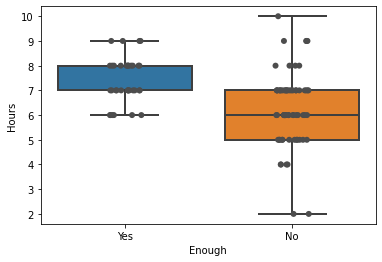

In [25]:
sns.boxplot(x = 'Enough',y = 'Hours',data=df)
sns.stripplot(x="Enough", y="Hours", data=df,
              size=6, color=".3", linewidth=0)


In [10]:
df.groupby(pd.Grouper(key="Enough")).mean()

,Hours,Tired
Enough,,
Yes,7.400000,2.500000
No,6.268657,3.382353


Here we can see that on average, those who slept enough, slept for ~1 hour more than those who reported not sleeping well! Also the average tiredness score was one whole point lower for those who slept well than those who didn't.

Another thing to note from the boxplot is, There is less variability in the group that reported sleeping well as compared to group that reported not sleeping well. 

Next let's look closely at the relationship between feeling tired and sleep hours

Text(0.5, 0, 'Intensity of Tiredness')

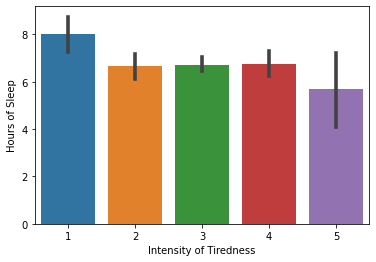

In [22]:
sns.barplot(x = 'Tired',y='Hours',data=df)
plt.ylabel('Hours of Sleep')
plt.xlabel('Intensity of Tiredness')

In [19]:
df.groupby(pd.Grouper(key="Tired")).mean().reset_index().sort_values('Tired')

,Tired,Hours
4,1,8.000000
1,2,6.653846
0,3,6.717949
2,4,6.739130
3,5,5.700000


Those who felt least tired slept longer ~8 hrs which is an international average sleep score, in comparison to those who felt most tired slept who slept on average 5.7 hrs.


Now Let's see relationship between phone use and sleep sufficiency.

In [20]:
pp_df = df.copy()
pp_df.Enough = pp_df.Enough.eq('Yes').mul(1)
pp_df.PhoneReach = pp_df.PhoneReach.eq('Yes').mul(1)
pp_df.PhoneTime = pp_df.PhoneTime.eq('Yes').mul(1)
pp_df.Breakfast = pp_df.Breakfast.eq('Yes').mul(1)
                                        

Text(0.5, 1.0, 'Sleep Hours by Phone Reach Preference')

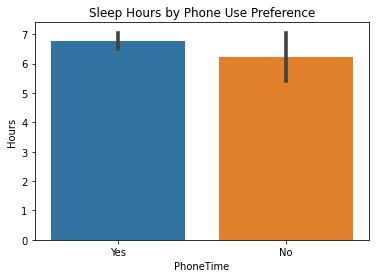

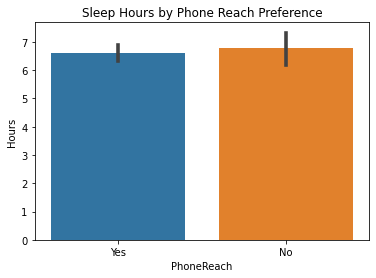

In [21]:
sns.barplot(x = 'PhoneTime',y='Hours',data=df)
plt.title('Sleep Hours by Phone Use Preference')
plt.figure()
sns.barplot(x='PhoneReach',y='Hours',data=df)
plt.title('Sleep Hours by Phone Reach Preference')


Looks like there is no difference at all in total sleep hours between those who use phone and those who don't.

However, let's see if there is a difference in their perception of sleep quality.
i.e., What is the percentage of people saying they slept enough when they use or don't use phone.

Text(0.5, 1.0, 'probability of Enough sleep "yes" Reports')

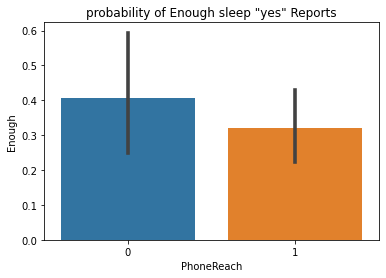

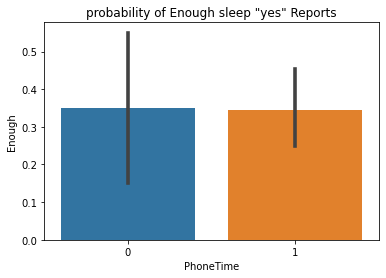

In [23]:
sns.barplot(x='PhoneReach',y='Enough',data = pp_df)
plt.title('Phone Reach ')
plt.title('probability of Enough sleep "yes" Reports')
plt.figure()

sns.barplot(x='PhoneTime',y='Enough',data=pp_df)
plt.title('Phone Time ')
plt.title('probability of Enough sleep "yes" Reports')



Those who sleep close to Phone are less likely to say that they had enough sleep as compared to those who sleep away from phone, but there was no such relation between those who used phone in the last 30 mins and those who didn't.

We will have to dig deeper into these analyses, since remember, we already have most people using phones, 

But for now, let's look at breakfast and tiredness.

Text(0.5, 0, 'Tiredness Score')

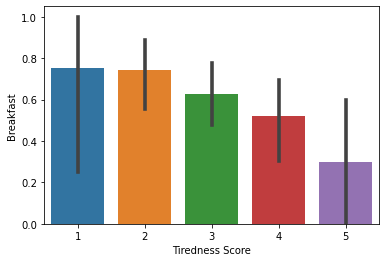

In [91]:
sns.barplot(x='Tired',y='Breakfast',data = pp_df)
plt.xlabel('Tiredness Score')

Those who feel less tired are also the ones who are more likely to report having breakfast, this isn't surprising, or is it? Now let's check whether this relationship is mediated by the phone use.

<AxesSubplot:xlabel='PhoneReach', ylabel='Tired'>

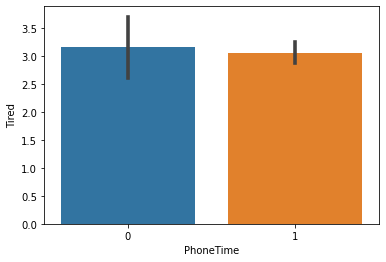

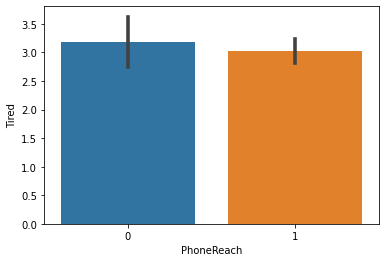

In [25]:
sns.barplot(x='PhoneTime',y='Tired',data = pp_df)
plt.figure()
sns.barplot(x='PhoneReach',y='Tired',data = pp_df)


From these graphs, It looks like there is no difference between tiredness scores and phone use.

Finally, is there a relationship between having breakfast and using phone in the night?


<AxesSubplot:xlabel='PhoneReach', ylabel='Breakfast'>

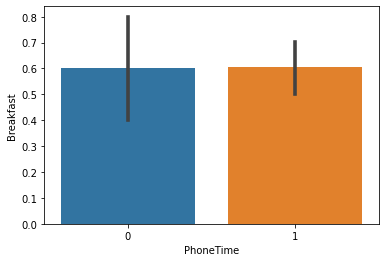

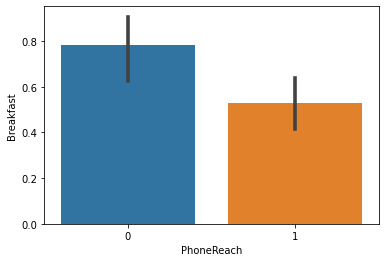

In [26]:
sns.barplot(x='PhoneTime',y='Breakfast',data = pp_df)
plt.figure()
sns.barplot(x='PhoneReach',y='Breakfast',data = pp_df)



Wow, there is no effect of using phone in the last 30 mins before sleep, but there is a clear effect of whether phone is in arm's reach.

People who don't keep phones close to them are more likely to have breakfast than those who don't. We could speculate that those who keep their phones close to them, are likely to use phones in bed in the morning, and hence less likely to have breakfast.

In [28]:
pp_df.groupby(pd.Grouper(key="PhoneReach")).mean()

,Enough,Hours,PhoneTime,Tired,Breakfast
PhoneReach,,,,,
1,0.319444,6.605634,0.847222,3.027778,0.527778
0,0.406250,6.774194,0.718750,3.187500,0.781250


This is interesting, those who kept phone close to them and those who didn't, slept almost the same number of hours,
but look at the "Breakfast" field. 52% of those who kept phones in arm's reach had breakfast as compared to 78% in the group who didn't keep phone close to them.


Now the last thing that looks interesting from the above column is to test whether those who kept phones in arm's reach are also likely to report differently on whether they had enough sleep or not.


<AxesSubplot:xlabel='PhoneReach', ylabel='Enough'>

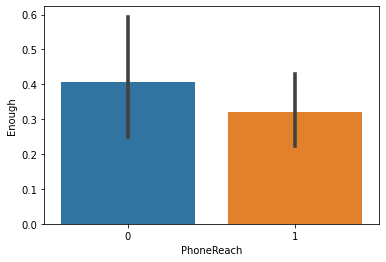

In [80]:
sns.barplot(x='PhoneReach',y='Enough',data = pp_df)


Looks like there is a slight difference, but most likely not significant.

One can also wonder, Is there a relationship between sleeping hours and having breakfast?

<AxesSubplot:xlabel='Breakfast', ylabel='Hours'>

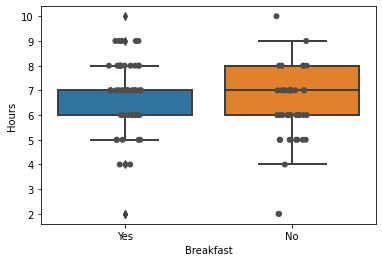

In [82]:
sns.boxplot(x='Breakfast',y='Hours',data = pp_df)
sns.stripplot(x="Breakfast", y="Hours", data=df,
              size=6, color=".3", linewidth=0)

The two distributions are very close, likely there isn't a relation.

# Let's look at the data more carefully now

In [31]:
import scipy.stats as spstats

### Breakfast vs Tiredness

First let's find out if there is a significant relation between feeling tired and having breakfast or not (from the graph above, we expect a relation!)
 
Since these are both categorical variable, first we need to build a contingency table. i.e. # of subjects in each category.


In [46]:
cont_table = pd.crosstab(df.Tired, df.Breakfast)
cont_table

Breakfast,No,Yes
Tired,,
1,1,3
2,7,20
3,15,25
4,11,12
5,7,3


First thing to note here is how imbalanced these categories are! e.g. there are only 4 total people who reported not feeling tired at all, in comparison to 40 people who reported an average tiredness score of 3. So the conclusions that we drew just by looking at the bar plots might not be accurate!

We will use a chi-squared statistics, that allows us to test if the joint distributions in both categories is uniform, meaning wheteher these two variables are independent (this is our null hypothesis, or a counter hypothesis).

In [56]:
chi2, p, dof, expected = spstats.chi2_contingency(cont_table,lambda_='log-likelihood')
print('chi2 = ', chi2)
print('p-val = ', p)
print('expeted=' )
pd.DataFrame(expected)

chi2 =  7.099959704067791
p-val =  0.13069916497954134
expeted=


,0,1
0,1.576923,2.423077
1,10.644231,16.355769
2,15.769231,24.230769
3,9.067308,13.932692
4,3.942308,6.057692


This would suggest that there is no significant relation between breakfast and tiredness.

However, as per the guidelines, the validity of this test will be questioned here, since we do not have enough data for each cell. So the results for this part would be "Inconclusive."

### Phone Reach vs Breakfast

In [106]:
usephone =  pp_df[pp_df['PhoneReach'] == 1]['Breakfast']
dontusephone = pp_df[pp_df['PhoneReach'] == 0]['Breakfast']
spstats.kruskal(usephone, dontusephone)    


KruskalResult(statistic=5.692434339303881, pvalue=0.017038203201089563)

We can say that, there is a significant difference in probability of having breakfast, between those who keep phones in arm's reach and those who don't. Since the null hypothesis that both groups have equal probability of having breakfast has very low probability (p=0.014).

However, note we need to look at the "joint distribution" between these two variables to really test if there is a correlation between Phone Reach and Breakfast. For this we will repeat the Pearson's Chi-Square analysis as before.

In [62]:
cont_table2 = pd.crosstab(df.PhoneReach, df.Breakfast)
cont_table2

Breakfast,No,Yes
PhoneReach,,
No,7,25
Yes,34,38


Here we can see that of those who kept the phone close to them: ~ half had breakfast and half didn't.
However, those who didn't keep phone close in arm's reach, almost always had breakfast.

This suggests that there must be a relationship between these variables.

In [65]:
chi2, p, dof, expected = spstats.chi2_contingency(cont_table2,lambda_='log-likelihood')
print('chi2 = ', chi2)
print('p-val = ', p)
print('expeted=' )
pd.DataFrame(expected)

chi2 =  5.171160158238317
p-val =  0.022964873971438402
expeted=


,0,1
0,12.615385,19.384615
1,28.384615,43.615385


Here we confirm that there is a significant relation between having breakfast and keeping phone in arm's reach, since the null hypothesis of independence of two variables is low (p-val =0.02)

In particular, people who didn't have breakfast and didn't keep phones in arm's reach are less than expected.
People who did both are also less than expected, 

While people who had breakfast and did not keep phone in arm's reach or people who didn't have breakfast and kept phone in arm's reach are more than expected. (Sounds complicated? That's why we need math!).

### Phone Reach and Sleep Sufficiency

In [74]:
cont_table3 = pd.crosstab(df.PhoneReach, df.Enough)
cont_table3

Enough,No,Yes
PhoneReach,,
No,19,13
Yes,49,23


In [76]:
chi2, p, dof, expected = spstats.chi2_contingency(cont_table3,lambda_='log-likelihood')
print('chi2 = ', chi2)
print('p-val = ', p)
print('expeted=' )
pd.DataFrame(expected)

chi2 =  0.3999650906141028
p-val =  0.5271072860735326
expeted=


,0,1
0,20.923077,11.076923
1,47.076923,24.923077


There doesn't seem to be any relationship between keeping phone close and having enough sleep, since observed distribution is very close to that expected from null hypothesis.

### Phone Reach and Tiredness

In [78]:
cont_table4 = pd.crosstab(df.PhoneReach, df.Tired)
cont_table4

Tired,1,2,3,4,5
PhoneReach,,,,,
No,2,10,7,6,7
Yes,2,17,33,17,3


Again, here we don't have sufficient data. However, if we combined tiredness scales 1-2 and 4-5 we could gain some insights, we will do that in future.

### Sleep And Breakfast

In [94]:
'''
We need to handle missing value from Hours column before we can check this.
We will simply remove those two subjects who do not have entries for how many hours on average they sleep.
'''
pp_df = pp_df.dropna()

In [107]:
hours_nobf =  pp_df[pp_df['Breakfast'] == 0]['Hours']
hours_yesbf = pp_df[pp_df['Breakfast'] == 1]['Hours']
spstats.kruskal(hours_nobf, hours_yesbf)    



KruskalResult(statistic=5.4916583555937475, pvalue=0.019107410844146248)

In [98]:
pp_df.groupby(pd.Grouper(key="Breakfast")).mean()

,Enough,Hours,PhoneReach,PhoneTime,Tired
Breakfast,,,,,
1,0.393443,6.918033,0.606557,0.819672,2.885246
0,0.268293,6.268293,0.829268,0.804878,3.390244


Initially, from a simple non-parametric Kruskal-Wallis H-test we can see that there is a very small but significant difference in sleep hours between those who had breakfast and those who didn't. Those who had breakfast slept on average ~40 mins more than those who didn't have breakfast! 

However, given the variability of sample, this is a weak conclusion, and we probably need more data for this (check the box-plot above!)


Here we treated tiredness scores as categorical variable during statistical analysis, which is the right way. However, we could take a look at it as continous variable, too. To get some idea about it.As we can see that average tiredness scores were different across many categories.
 
More on this debate here: https://www.theanalysisfactor.com/can-likert-scale-data-ever-be-continuous/

To conclude, keeping phone in arm's reach is related to having breakfast or not. The data is insufficient to make any other conclusions. In future, if we have more data, we can look at how tiredness is related to having breakfast, and keeping phone close to bed.


We couldn't find any significant strong relation between phone use and sleep sufficiency. Or sleep sufficiency and having breakfast. However, we indeed see that those who reported having breakfast, slept more than those who didn't. We couldn't see the same effect on 

In future, going towards more multivariate approaches, we would try to use "Factor Analysis" to understand how each of these variables are related to each other, and also try to predict whether someone will have breakfast or not, based on all other factors!